In [1]:
import tensorflow as tf

In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-12-15 18:05:23--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-12-15 18:05:23 (35.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [8]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [9]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [13]:
X = data[:,0].reshape(-1,1)#making an N x D
Y=data[:,1]

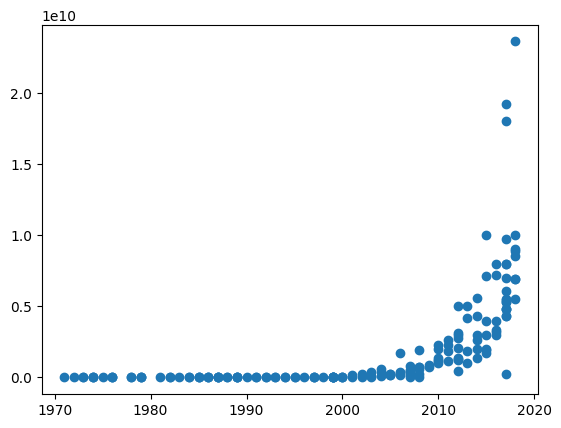

In [14]:
# Plot the data
plt.scatter(X,Y)

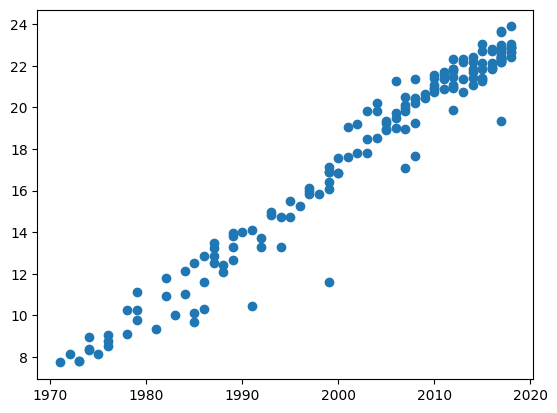

In [15]:
# Y değerlerini logaritmik olarak dönüştür
Y = np.log(Y)
plt.scatter(X,Y)

In [16]:
X = X - X.mean()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Tek özellikli giriş
    tf.keras.layers.Dense(1)  # Tek nöronlu çıkış
])

In [24]:
# Modelin derlenmesi
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),  # Öğrenme oranı 0.001, momentum 0.9
    loss='mse'  # Ortalama kare hata kayıp fonksiyonu
)


In [25]:
# Öğrenme oranı planlayıcı
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001  # 50. epoch'tan sonra düşük öğrenme oranı
    return 0.001  # İlk 50 epoch için yüksek öğrenme oranı

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


In [26]:
# Modelin eğitimi
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 322.8770 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 440.5214 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 278.1871 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218.8111 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 211.3764 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144.1674 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125.3932 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119.4937 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.0793 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.9004 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.4623 - learning_rate: 0.0010
Epoch 12/2

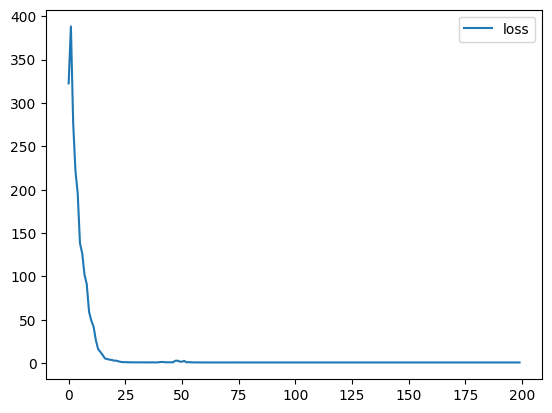

In [27]:
# Plot the loss
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [28]:
model.layers

[<Dense name=dense_1, built=True>]

In [29]:
model.layers[0].get_weights()

[array([[0.33476016]], dtype=float32), array([17.76228], dtype=float32)]

In [30]:
a = model.layers[0].get_weights()[0][0,0]
a

0.33476016

In [32]:
# Derste formül anlatıyor (hatırlamk için dinle) 3:14

In [33]:
print("Time to double:",np.log(2)/a)

Time to double: 2.0705784765560016


In [34]:
X = X.flatten()
denominator = X.dot(X)-X.mean() * X.sum()
a = (X.dot(Y)-Y.mean()*X.sum())/denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator
print(a,b)

0.341682487387313 17.764939393631764


In [36]:
import numpy as np

# Veriyi düzleştirme
X = X.flatten()  # X'i tek boyutlu hale getir

# Denominator (payda) hesaplama
denominator = X.dot(X) - X.mean() * X.sum()

# Eğim (a) hesaplama
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator

# Kesişim (b) hesaplama
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

# Sonuçları yazdır
print("Slope (a):", a)
print("Intercept (b):", b)


Slope (a): 0.341682487387313
Intercept (b): 17.764939393631764


In [37]:
print("Time to double:",np.log(2)/a)

Time to double: 2.0286295205239204
